In [56]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [362]:
def generator(input):
    with tf.variable_scope('generator'):
        input = tf.layers.dense(input, 10, activation=tf.nn.relu)
        input = tf.layers.dense(input, 100, activation=tf.nn.relu)
        input = tf.layers.dense(input, 100, activation=tf.nn.relu)
        input = tf.layers.dense(input, 10, activation=tf.nn.relu)
        input = tf.layers.dense(input, 1)
        return input

def discriminator(input, reuse):
    with tf.variable_scope('discriminator', reuse=reuse):
        input = tf.layers.dense(input, 10, activation=tf.nn.relu)
        input = tf.layers.dense(input, 100, activation=tf.nn.relu)
        input = tf.layers.dense(input, 100, activation=tf.nn.relu)
        input = tf.layers.dense(input, 10, activation=tf.nn.relu)
        input = tf.layers.dense(input, 1)
        return tf.nn.sigmoid(input)

In [363]:
sess.close()
tf.reset_default_graph()

fake_ph = tf.placeholder(tf.float32, (None, 1))
true_ph = tf.placeholder(tf.float32, (None, 1))

true = discriminator(true_ph, False)
fake_data = generator(fake_ph)
fake = discriminator(fake_data, True)

d_loss = tf.reduce_mean(tf.log(true) + tf.log(1 - fake))
g_loss = tf.reduce_mean(tf.log(fake))

In [364]:
d_params = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'discriminator')
d_opt = tf.train.AdamOptimizer(5e-4).minimize(-d_loss, var_list=d_params)

g_params = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'generator')
g_opt = tf.train.AdamOptimizer(1e-5).minimize(-g_loss, var_list=g_params)

In [365]:
sess = tf.InteractiveSession()

In [366]:
sess.run(tf.global_variables_initializer())

In [367]:
batch_size = 100
std = .3

In [368]:
d_losses, g_losses = [], []

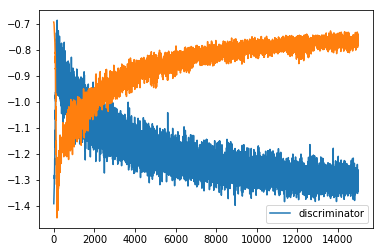

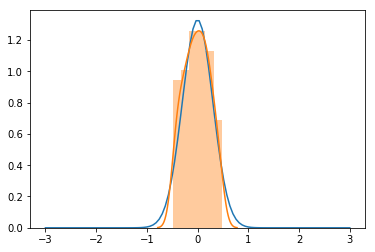

In [389]:
for i in range(1000):
    x = np.random.normal(scale=std, size=(batch_size, 1))
    z = np.random.uniform(size=(batch_size, 1))

    loss, _ = sess.run([d_loss, d_opt], {fake_ph: z, true_ph: x})
    d_losses.append(loss)

    z = np.random.uniform(size=(batch_size, 1))
    loss, _ = sess.run([g_loss, g_opt], {fake_ph: z})
    g_losses.append(loss)
    
plt.plot(d_losses, label='discriminator')
plt.plot(g_losses)
plt.legend()

plt.figure()
x = np.linspace(-3, 3, 100)
plt.plot(x,mlab.normpdf(x, 0, std))
z = sess.run(fake_data, {fake_ph: np.linspace(0, 1, 100)[:, None]})
sns.distplot(z);